<h1><center><font color='darkblue',size = 12>CAB INVESTMENT DATA ANALYSIS</font></center></h1>


<h3><right>Runa Veigas</right></h3>runaveigas@gmail.com

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Objective</li>
        <li>Loading Files</li>
        <li>Hypothesis Testing</li>
        <li>Exploratory Data Analysis</li>
        <li>EDA Recommendations</li>
    </ul>
   
</div>

<hr>


## Objective

XYZ a private firm in USA is planning on investing in a Cab Company. XYZ needs help to identify the right company to make their investment. The analysis is performed on two cab companies namely “Pink Company” and “Yellow Company”. 17 different attributes where considered to perform the analysis(4 derived attributes). The data had information of 2 cab companies(Pink/Yellow) from 2016-2018. Analysis was primarily focused on the Customer reach and net profit earned by each company across the years.

In [1]:
import datetime as dt
import sidetable
from statsmodels.stats.anova import AnovaRM
from scipy import stats

<h2 id = "files">Loading Files</h2>

In [4]:
customers = pd.read_csv('Customer_ID.csv')
cab = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
transaction = pd.read_csv('Transaction_ID.csv')
df = pd.read_csv('Final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Hypothesis Testing


### 1. To check if cab preference is based on gender.
#### Hypothsis
$H_O$: There is no association between gender and cab preference<br>
$H_A$: There is association between gender and cab preference
#### Test Used
Chi Square Test of Independence(Non Parametric Test)

In [5]:
 df.groupby(['Company','Gender'])['Company'].count().unstack('Company').fillna(0)

Company,Pink Cab,Yellow Cab
Gender,,
Female,37480,116000
Male,47231,158681


In [6]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = [[37480,116000],[47231,158681]]
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

[[37480, 116000], [47231, 158681]]
dof=1
[[ 36176.22061704 117303.77938296]
 [ 48534.77938296 157377.22061704]]
probability=0.950, critical=3.841, stat=107.221
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


__Thus we reject the null hypothesis that there is no assocation between gender and cab preference and conclude that there is a association between gender and cab preference at 0.05 level significance.__

### 2. To check if gender is associated with price charged for the cab services changes across time .
#### Hypothesis
$H_O$: There is no diffrence in gender for price charged for cab services<br>
$H_A$: There is diffrence in gender for price charged for cab services
#### Test Used
Chi Square Test of Independence(Non Parametric Test)

In [7]:
df.groupby(['Gender','Year'])['Price Charged'].count().unstack(1).fillna(0)

Year,2016,2017,2018
Gender,,,
Female,45126,55019,53335
Male,63096,72945,69871


In [8]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = [[45126,55019,53335],[63096,72945,69871]]
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

[[45126, 55019, 53335], [63096, 72945, 69871]]
dof=2
[[46216.70087258 54647.61241207 52615.68671534]
 [62005.29912742 73316.38758793 70590.31328466]]
probability=0.950, critical=5.991, stat=66.495
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


__Thus we reject the null hypothesis and conclude that there is a significant diffrence in gender and price charged in 2016,17,18.__

### 3. Checking if there is a diffrence in profit accross years.

Since profit is a continuous variable and since we are assuming that the data coming from same population I use Repeated Measure Design to check if there is a diffrence in profit accross years.

#### Hypothesis
$H_O$: Mean of profit for 2016,2017 and 2018 is equal.<br>
$H_A$: Atleast one mean of profit for 2016,2017 and 2018 is diffrent from the rest.<br>
#### Test Used
Friedman ANOVA (Non Parametric Version of Repeated Measures ANOVA)

In [9]:

#perform the repeated measures ANOVA
sf = df.groupby(['Year','Customer ID'])['Profit'].mean().unstack(0).fillna(0)
#sf.to_csv('MyData.csv',index = False)
sf = pd.read_csv('MyData.csv')
#perform Friedman Test
y16 = list(sf['y16'])
y17 = list(sf['y17'])
y18 = list(sf['y18'])
stats.friedmanchisquare(y16, y17, y18)


<IPython.core.display.Javascript object>

FriedmanchisquareResult(statistic=844.4159558247853, pvalue=4.339153133369048e-184)

__Since the p value is less than 0.05 we can reject the null hypothesis and conclude that the average profit across 2016,2017 and 2018 is not equal__

### 4. To check if the average number of customers in Pink Cab is equal to Yellow Cab
#### Hypothesis
__$H_0$__: Avergae profit earned by Pink Cab is equal to Yellow Cab($\mu_1 = \mu_2$)<br>
__$H_A$__: Avergae profit earned by Pink Cab is not equal to Yellow Cab($\mu_1 \neq \mu_2$)<br>

#### Test Used
Since the population standard deviation is not given I will be using __two sample pooled t test__.
$
\begin{equation}
    \frac{(\hat{m_1} - \hat{m_2})-d_o}{s_p\sqrt{\frac{1}{n_2}+\frac{1}{n_2}}}
\end{equation}
$

In [10]:
def t_pooled(m1,m2,s1,s2,n1,n2):
    num = m1 - m2
    sp = np.sqrt(((s1**2*(n1-1)) + (s2**2*(n2-1)))/(n1+n2-2))
    denom = sp*(np.sqrt((1/n1)+(1/n2)))
    
    return (num/denom)

In [11]:
n1 = (df[df['Company'] == 'Pink Cab' ]).shape[0]
n2 = (df[df['Company'] == 'Yellow Cab' ]).shape[0]

a = (df[df['Company'] == 'Pink Cab'])
m1 = a['Profit'].describe()['mean']
s1 = a['Profit'].describe()['std']

b = (df[df['Company'] == 'Yellow Cab'])
m2 = b['Profit'].describe()['mean']
s2 = b['Profit'].describe()['std']

t_pooled(m1,m2,s1,s2,n1,n2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

-160.37151759478007

# Exploratory Data Analysis

### Exploring the Original Data

In [12]:
customers.rename(columns = {'Income (USD/Month)' : 'Monthly Income'},inplace = True)

In [13]:
# Checking if the customers are unique
len(set(customers['Customer ID'])) == len(customers['Customer ID'])

True

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Cab  Details')

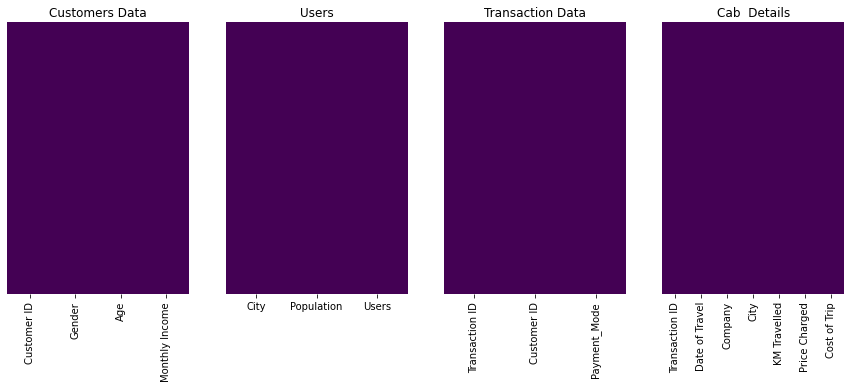

In [14]:
f,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,sharey=True,figsize=(15,5))

a = sns.heatmap(customers.isnull(),yticklabels = False, cbar = False, cmap = 'viridis',ax = ax1)
c = sns.heatmap(transaction.isnull(),yticklabels = False,cbar = False,cmap = 'viridis',ax = ax3)
d = sns.heatmap(cab.isnull(),yticklabels = False,cbar = False,cmap = 'viridis',ax = ax4)
b = sns.heatmap(city.isnull(),yticklabels = False,cbar = False,cmap = 'viridis',ax = ax2)

a.set_title("Customers Data")
b.set_title("Users")
c.set_title("Transaction Data")
d.set_title("Cab  Details")

__Conclusion__: There are no null values in the given dataset.

In [15]:
df = cab.merge(transaction,how = 'left',on = 'Transaction ID')
new_df = df.merge(customers,how = 'left',on = 'Customer ID')

### Merged Dataset

In [16]:
df = pd.read_csv('Final.csv')
df.shape

<IPython.core.display.Javascript object>

(359392, 17)

In [17]:
#df['new_date'] = datetime(1900,1,28) + df['Date of Travel'].map(dt.timedelta)
#df['Date'] = datetime(1899,12,29) + df['Date of Travel'].map(dt.timedelta)
#df.drop(['Date of Travel'],axis = 1,inplace = True)
df['Date'] = pd.to_datetime(df['Date'])
df['Day Name'] = df['Date'].dt.day_name()

<IPython.core.display.Javascript object>

### Missing Values

In [18]:
def nullValues(df):
    numMissing = df.isnull().sum()
    percentMissing = (100 * numMissing)/len(df)
    concatValues = pd.concat([numMissing,percentMissing],axis = 1)
    print()
    
    #Renaming and Sorting the percentage of missing values in non ascending order
    missingRenamed = concatValues.rename(columns = {0:"Missing Values", 1: "Percentage of Missing"})
    missingRenamedSorted = missingRenamed.sort_values(by = 'Percentage of Missing',ascending = False).round(1) 
    print("RESULT: Data has totally {} coloumns out of which {} coloumns have missing values.".format
          (df.shape[1],missingRenamedSorted.shape[0]))
    return missingRenamedSorted


In [19]:
type(df['Company'])

pandas.core.series.Series

In [20]:
missingValues = nullValues(df)
missingValues

<IPython.core.display.Javascript object>


RESULT: Data has totally 18 coloumns out of which 18 coloumns have missing values.


,Missing Values,Percentage of Missing
Transaction ID,0,0.0
Company,0,0.0
Profit,0,0.0
Year,0,0.0
Month,0,0.0
Day,0,0.0
Date,0,0.0
New Date,0,0.0
Monthly Income,0,0.0
Age,0,0.0


The merged data does not have missing coloumns as found above. All transaction details are very important as there could be repeated customers having diffrent transaction id's thus I checked if there was any duplicate for transaction details and customer id combined together. There were no duplicates found.

In [21]:
v1 = df['Transaction ID'].astype(str)
v2 = df['Customer ID'].astype(str)
if (len(set(v1 + v2))) == (len(v1+v2)):
    print("RESULT: Dataset is unique.")
else:
    print("RESULT: Dataset is not unique")
    

RESULT: Dataset is unique.


In [22]:
df['Profit'] = df['Price Charged'] - df['Cost of Trip'] 

In [23]:
df[['KM Travelled','Profit','Price Charged','Cost of Trip','Age','Monthly Income']].describe()

,KM Travelled,Profit,Price Charged,Cost of Trip,Age,Monthly Income
count,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,22.567254,137.253198,423.443311,286.190113,35.336705,15048.822937
std,12.233526,160.311840,274.378911,157.993661,12.594234,7969.409482
min,1.900000,-220.060000,15.600000,19.000000,18.000000,2000.000000
25%,12.000000,28.012000,206.437500,151.200000,25.000000,8424.000000
50%,22.440000,81.962000,386.360000,282.480000,33.000000,14685.000000
75%,32.960000,190.030000,583.660000,413.683200,42.000000,21035.000000
max,48.000000,1463.966000,2048.030000,691.200000,65.000000,35000.000000


### Customer Reach

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

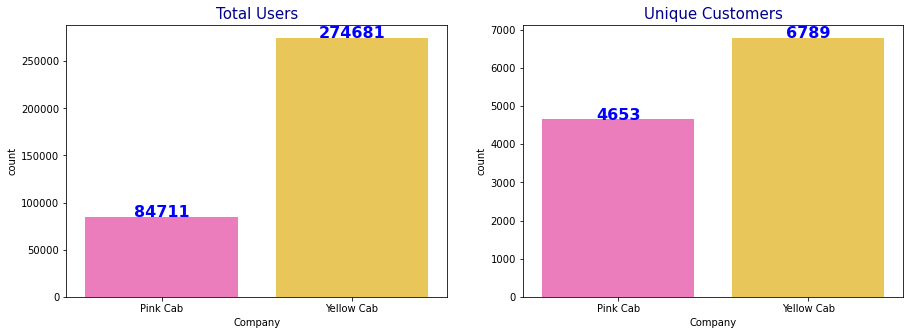

In [24]:
nf = df.drop_duplicates(subset = 'Customer ID',keep = False)
fig,(a1,a2) = plt.subplots(1,2,figsize = (15,5))

a = sns.countplot(data = df, x = 'Company',palette = ['#fd6bbe','#ffd343'],ax = a1)
a.set_title('Total Users',color = 'darkblue',fontsize = 15)


b = sns.countplot(data = nf, x = 'Company',palette = ['#fd6bbe','#ffd343'],ax = a2)
b.set_title('Unique Customers',color = 'darkblue',fontsize = 15)


a.set_xticklabels(a.get_xticklabels(),rotation=0)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",color='b',weight='bold',size=16)

b.set_xticklabels(b.get_xticklabels(),rotation=0)
for p in b.patches:
    height = p.get_height()
    b.text(p.get_x()+p.get_width()/2., height + 0.5,height,ha="center",color='b',weight='bold',size=16)

In [25]:
Pink_Cab = df[df['Company'] == 'Pink Cab']
Yellow_Cab = df[df['Company'] == 'Yellow Cab']
print(Pink_Cab.shape,Yellow_Cab.shape)

(84711, 18) (274681, 18)


Profit is clearly right skewed.

### Growth of Revenue over time

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Profit Vs Year')

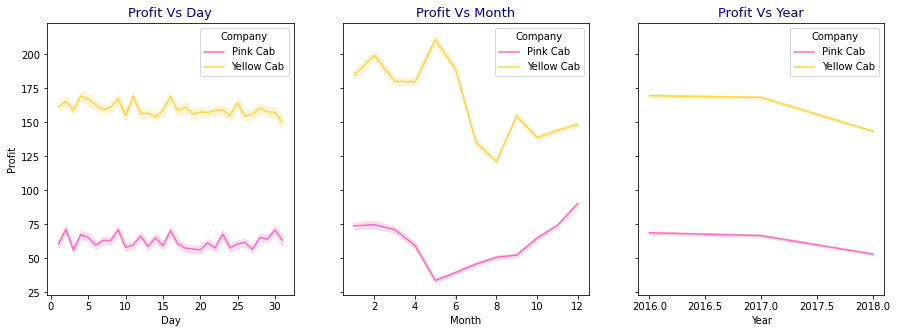

In [26]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,5))
a = sns.lineplot(data = df,x = 'Day' , y = 'Profit',hue = 'Company',palette = ['#fd6bbe','#ffd343'],ax = ax1)
b = sns.lineplot(data = df,x = 'Month' , y = 'Profit',hue = 'Company',palette = ['#fd6bbe','#ffd343'],ax = ax2)
c = sns.lineplot(data = df,x = 'Year' , y = 'Profit',hue = 'Company',palette = ['#fd6bbe','#ffd343'],ax = ax3)

a.set_title('Profit Vs Day',color = 'darkblue',fontsize = 13)
b.set_title('Profit Vs Month',color = 'darkblue',fontsize = 13)
c.set_title('Profit Vs Year',color = 'darkblue',fontsize = 13)

### Checking the price charged for the cab users

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Price Charged Per Month')

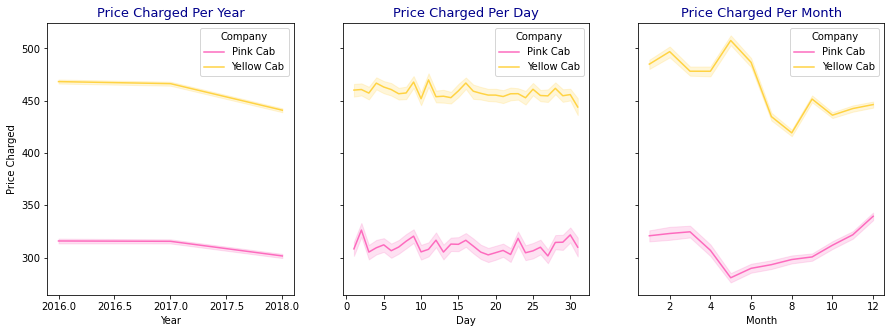

In [27]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,5))
a = sns.lineplot(data = df,x = 'Year' , y = 'Price Charged',hue = 'Company',palette = ['#fd6bbe','#ffd343'],ax = ax1)
b = sns.lineplot(data = df,x = 'Day' , y = 'Price Charged',hue = 'Company',palette = ['#fd6bbe','#ffd343'],ax = ax2)
c = sns.lineplot(data = df,x = 'Month' , y = 'Price Charged',hue = 'Company',palette = ['#fd6bbe','#ffd343'],ax = ax3)

a.set_title('Price Charged Per Year',color = 'darkblue',fontsize = 13)
b.set_title('Price Charged Per Day',color = 'darkblue',fontsize = 13)
c.set_title('Price Charged Per Month',color = 'darkblue',fontsize = 13)

### Checking how much company spent

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Cost Incured Per Month')

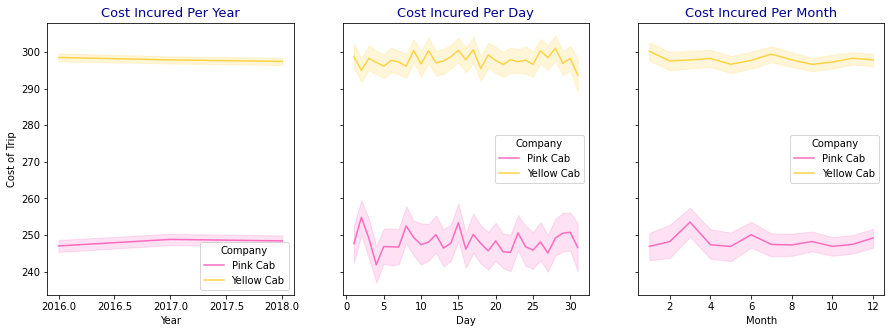

In [28]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,5))
a = sns.lineplot(data = df,x = 'Year' , y = 'Cost of Trip',hue = 'Company',palette = ['#fd6bbe','#ffd343'],ax = ax1)
b = sns.lineplot(data = df,x = 'Day' , y = 'Cost of Trip',hue = 'Company',palette = ['#fd6bbe','#ffd343'],ax = ax2)
c = sns.lineplot(data = df,x = 'Month' , y = 'Cost of Trip',hue = 'Company',palette = ['#fd6bbe','#ffd343'],ax = ax3)

a.set_title('Cost Incured Per Year',color = 'darkblue',fontsize = 13)
b.set_title('Cost Incured Per Day',color = 'darkblue',fontsize = 13)
c.set_title('Cost Incured Per Month',color = 'darkblue',fontsize = 13)

### Customer and Ride Analysis Day Wise

In [29]:
#fig,axs = plt.subplots(figsize = (15,6))
#sns.countplot(data = df,x = 'Day Name',order = df['Day Name'].value_counts().index)

In [30]:
agg_Customers_day = df.groupby(['Day Name', 'Company'])['Customer ID'].count().unstack().fillna(0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Number of Customers')

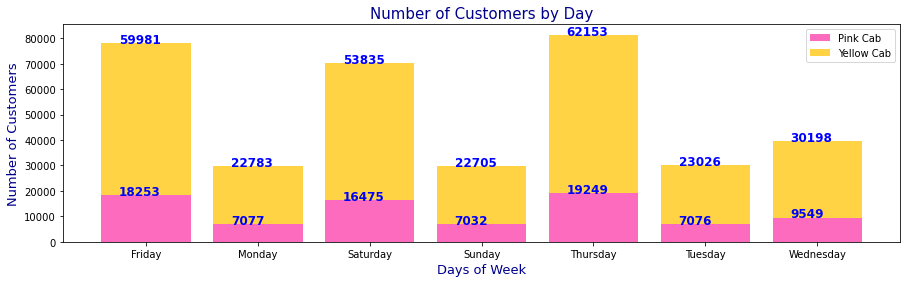

In [31]:
fig, ax = plt.subplots(figsize = (15,4))

colors = ['#fd6bbe','#ffd343']
bottom = np.zeros(len(agg_Customers_day))

for i, col in enumerate(agg_Customers_day.columns):
    ax.bar(agg_Customers_day.index, agg_Customers_day[col], bottom=bottom, label=col, color=colors[i])
    bottom += np.array(agg_Customers_day[col])

totals = agg_Customers_day.sum(axis=1)
y_offset = 0

y_offset = -0.0001
for bar in ax.patches:
  ax.text(
      bar.get_x() + bar.get_width() / 5,
      bar.get_height() + bar.get_y() + y_offset,
      round(bar.get_height()),
      ha='left',
      color='b',
      weight='bold',
      size=12
  )

ax.legend()

plt.title('Number of Customers by Day',color = 'darkblue',fontsize = 15)
plt.xlabel('Days of Week',color = 'darkblue',fontsize = 13)
plt.ylabel('Number of Customers',color = 'darkblue',fontsize = 13)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Number of Customers')

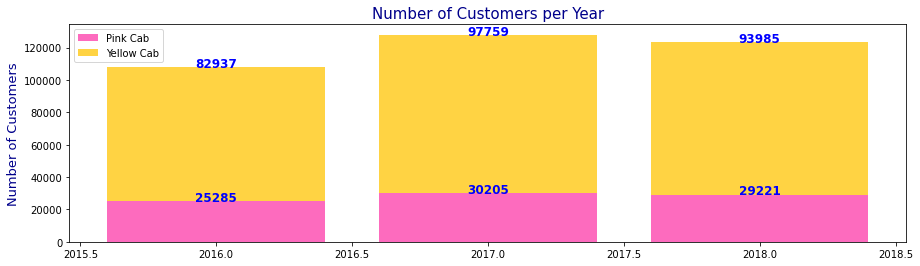

In [34]:
agg_Customers_year = df.groupby(['Year', 'Company'])['Customer ID'].count().unstack().fillna(0)

fig, ax = plt.subplots(figsize = (15,4))

colors = ['#fd6bbe','#ffd343']
bottom = np.zeros(len(agg_Customers_year))

for i, col in enumerate(agg_Customers_year.columns):
    ax.bar(agg_Customers_year.index, agg_Customers_year[col], bottom=bottom, label=col, color=colors[i])
    bottom += np.array(agg_Customers_year[col])

totals = agg_Customers_year.sum(axis=1)

y_offset = -20
for bar in ax.patches:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + bar.get_y() + y_offset,
      round(bar.get_height()),
      ha='center',
      color='b',
      weight='bold',
      size=12
  )

ax.legend()

plt.title('Number of Customers per Year',color = 'darkblue',fontsize = 15)
plt.xlabel('',color = 'darkblue',fontsize = 13)
plt.ylabel('Number of Customers',color = 'darkblue',fontsize = 13)

### Based on the ride distance

In [35]:
category = pd.cut(df['KM Travelled'],bins = [0,5,10,15,20,25,30,35,40,45,50],labels = ['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50'])
df.insert(2,'Distance KM',category)

<IPython.core.display.Javascript object>

In [36]:
##df.drop(['Distance KM'],axis =1,inplace = True)

In [37]:
agg_Distance = df.groupby(['Distance KM', 'Company'])['Customer ID'].count().unstack().fillna(0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Number of Customers')

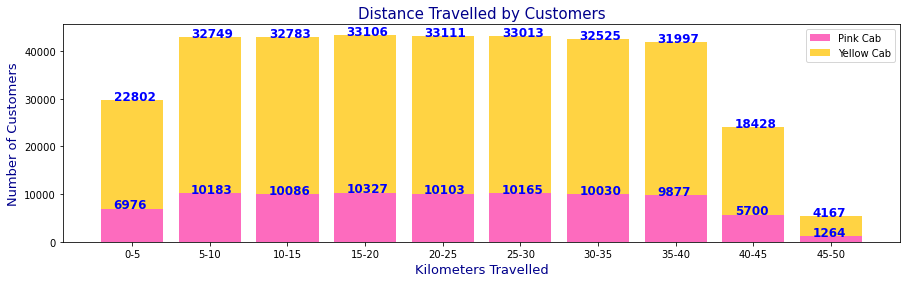

In [38]:
fig, ax = plt.subplots(figsize = (15,4))

colors = ['#fd6bbe','#ffd343']
bottom = np.zeros(len(agg_Distance))

for i, col in enumerate(agg_Distance.columns):
    ax.bar(agg_Distance.index, agg_Distance[col], bottom=bottom, label=col, color=colors[i])
    bottom += np.array(agg_Distance[col])

totals = agg_Distance.sum(axis=1)
y_offset = 0

y_offset = -0.0001
for bar in ax.patches:
  ax.text(
      bar.get_x() + bar.get_width() / 5,
      bar.get_height() + bar.get_y() + y_offset,
      round(bar.get_height()),
      ha='left',
      color='b',
      weight='bold',
      size=12
  )

ax.legend()

plt.title('Distance Travelled by Customers',color = 'darkblue',fontsize = 15)
plt.xlabel('Kilometers Travelled',color = 'darkblue',fontsize = 13)
plt.ylabel('Number of Customers',color = 'darkblue',fontsize = 13)

## Are the cutomers loyal?

In [39]:
d1 = df.groupby(['Customer ID','Company'])['Company'].count().unstack('Company').fillna(0)
d1.nlargest(10,'Pink Cab')

Company,Pink Cab,Yellow Cab
Customer ID,,
8120,18.0,9.0
6159,17.0,17.0
7927,17.0,15.0
8595,17.0,14.0
7340,16.0,12.0
8474,16.0,11.0
8915,16.0,9.0
6416,15.0,8.0
7764,15.0,7.0


In [40]:
d1.nlargest(10,'Yellow Cab')

Company,Pink Cab,Yellow Cab
Customer ID,,
494,7.0,47.0
1360,2.0,47.0
1803,3.0,47.0
636,0.0,46.0
126,5.0,45.0
903,5.0,45.0
2766,6.0,45.0
992,3.0,44.0
1070,7.0,44.0


In [41]:
a = df[df['Customer ID'] == 8120]
b = df[df['Customer ID'] == 6159]
c = df[df['Customer ID'] == 7927]
d = df[df['Customer ID'] == 8595]

In [42]:
u = df[df['Customer ID'] == 494]
v = df[df['Customer ID'] == 1360]
w = df[df['Customer ID'] == 1803]
y = df[df['Customer ID'] == 636]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Top Customer 4')

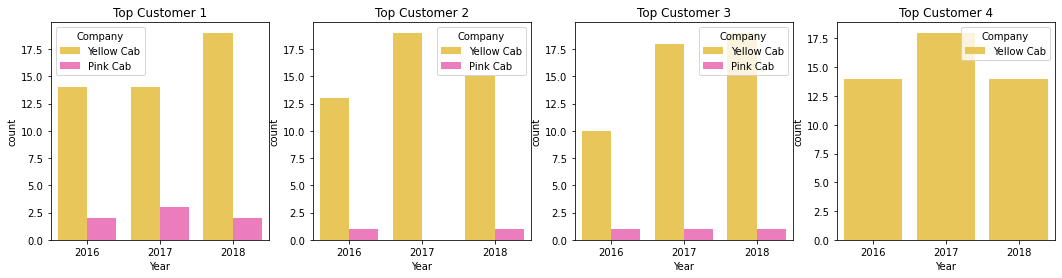

In [43]:
f,(a1,a2,a3,a4) = plt.subplots(1,4,figsize = (18,4))
first = sns.countplot(data = u,x = 'Year',hue = 'Company',palette = ['#ffd343','#fd6bbe'],ax = a1)
second = sns.countplot(data = v,x = 'Year',hue = 'Company',palette = ['#ffd343','#fd6bbe'],ax = a2)
third = sns.countplot(data = w,x = 'Year',hue = 'Company',palette = ['#ffd343','#fd6bbe'],ax = a3)
fourth = sns.countplot(data = y,x = 'Year',hue = 'Company',palette = ['#ffd343','#fd6bbe'],ax = a4)

first.set_title('Top Customer 1')
second.set_title('Top Customer 2')
third.set_title('Top Customer 3')
fourth.set_title('Top Customer 4')


### KM Travelled for Each Year

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-44-0f0ca91ab053>:8: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)


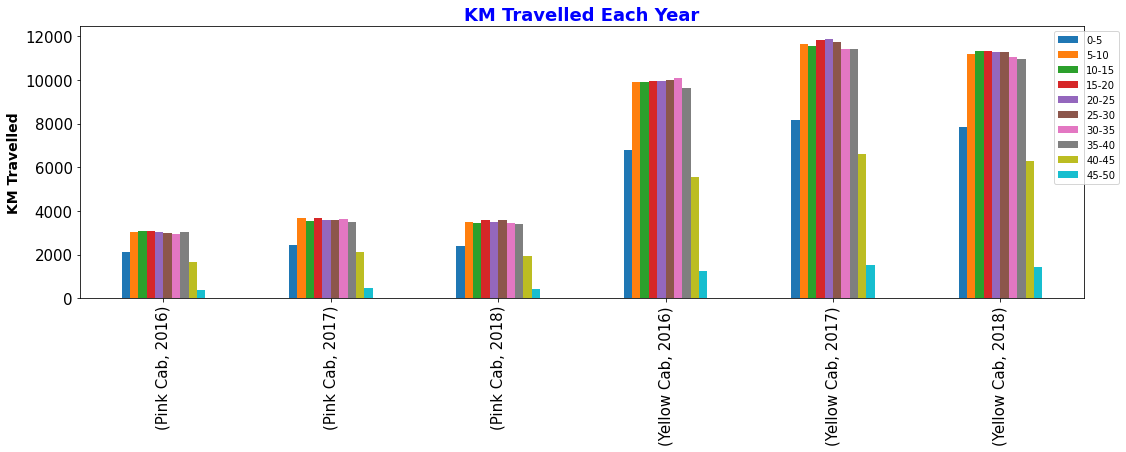

In [44]:

ax = df.groupby(['Company','Year'])['Distance KM'].value_counts().unstack(2).plot.bar(fontsize = 15,figsize = (18,5))
  
plt.ylabel('KM Travelled',fontweight ='bold', fontsize = 14)
plt.xlabel('')
plt.title('KM Travelled Each Year',fontweight ='bold', fontsize = 18,color = 'b')

leg = plt.legend(loc = 'best')
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
# Change to location of the legend. 
xOffset = 0.04

bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Price Charged vs Gender')

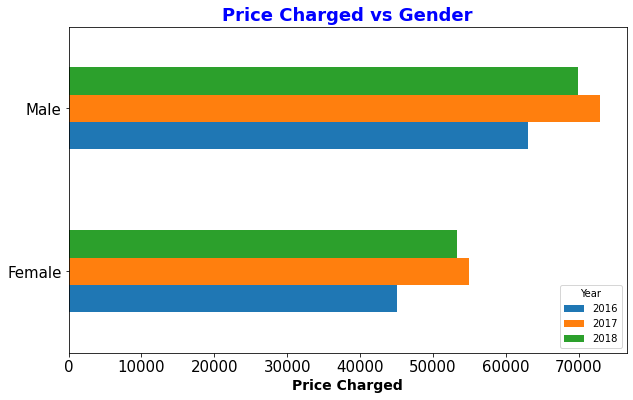

In [45]:
df.groupby(['Gender','Year'])['Price Charged'].count().unstack(1).fillna(0).plot.barh(fontsize = 15,figsize = (10,6))

plt.ylabel('')
plt.xlabel('Price Charged',fontweight ='bold', fontsize = 14)
plt.title('Price Charged vs Gender',fontweight ='bold', fontsize = 18,color = 'b')

There seems to be gender bias in the ptice charged for males and females

<h1><center><font color = 'darkblue',size = 12>EDA RECOMMENDATIONS</center></h1>

1. If Pink cab company is a startup, then it would be less risky to invest in the Pink cab company as their profit has a steady growth.
2. Customer reach needs to be improved if Pink cab company is chosen also since usage of cabs is more on weekends especially Thursdays, company could invest more on cabs for these days.
2. If Pink company is not a startup then Yellow Cab company is less risky to invest as they have successfully attracted the customers and Yellow cabs seem to be more common to users. 
3. However Yellow cab irrespective of major customer reach it has a drastic reduce in profit after 2017.
4. The reason for the increased number of users for Yellow Cab could be because the price charged was lesser even though the expenses where almost the same. Because of this, if Yellow Company increases its prices it is more likely that the number of customers would reduce.

In [46]:
df.shape

(359392, 19)